In [13]:
import pandas as pd
import sqlite3

## • analyze only the users and not the admins
## • analyze only the dates when there were both views and checker commits

In [14]:
con = sqlite3.connect('../data/checking-logs.sqlite.sqlite')
query1 = """
        SELECT timestamp FROM checker
        WHERE uid LIKE 'user_%'
        """
df = pd.io.sql.read_sql(query1, con, parse_dates='timestamp')
checker = df['timestamp'].dt.date.value_counts().reset_index()
checker.columns = ['date', 'commits']
checker

,date,commits
0,2020-05-14,575
1,2020-05-12,323
2,2020-04-26,261
3,2020-05-02,242
4,2020-05-13,211
5,2020-05-11,186
6,2020-05-03,180
7,2020-05-10,143
8,2020-05-05,139
9,2020-04-25,104


In [15]:
query2 = """
        SELECT datetime FROM pageviews
        WHERE uid LIKE 'user_%'
        """
df = pd.io.sql.read_sql(query2, con, parse_dates='datetime')
views = df['datetime'].dt.date.value_counts().reset_index()
views.columns = ['date', 'views']

In [16]:
res = pd.merge(views, checker, how='inner')
res.set_index('date', inplace=True)
res

,views,commits
date,,
2020-05-11,200,186
2020-05-14,187,575
2020-05-10,110,143
2020-05-13,102,211
2020-05-12,85,323
2020-05-18,51,3
2020-05-08,48,87
2020-05-15,29,10
2020-04-18,23,69


## • use size of the font should be 8, the size of the figure is (15,8)

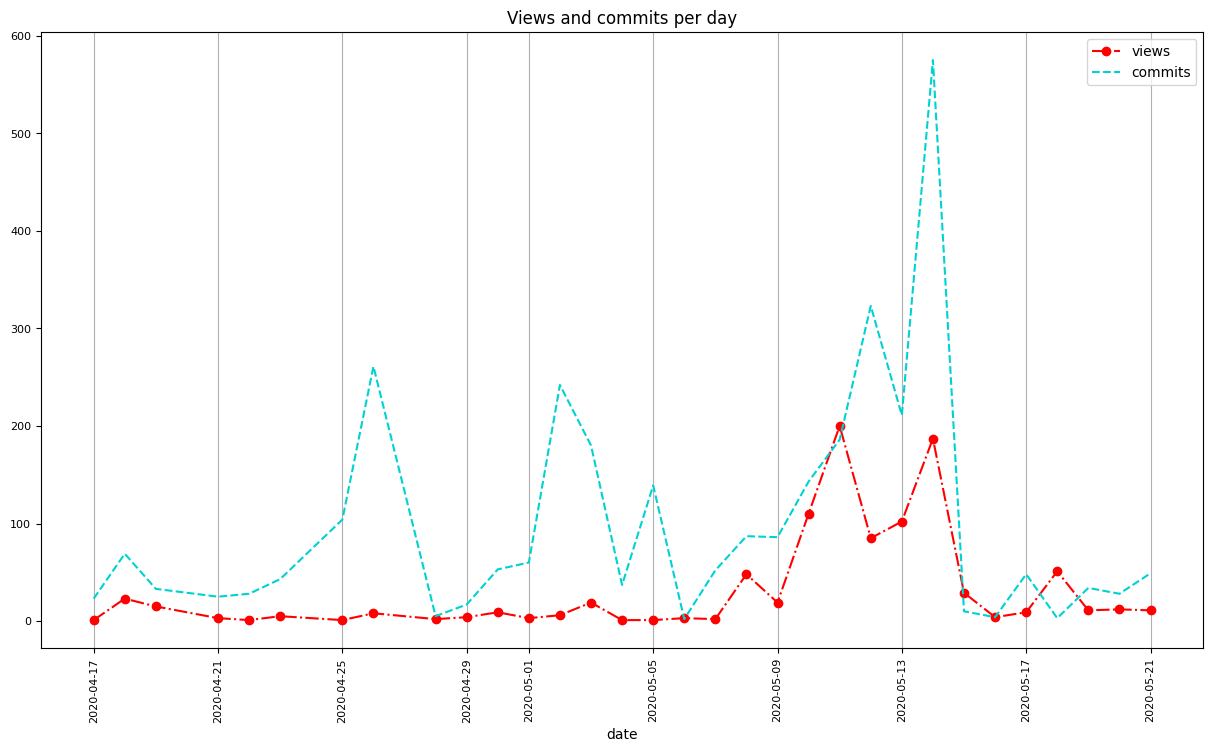

In [17]:
res.plot(fontsize=8, figsize=(15,8), title='Views and commits per day', rot=90, style=['o-.', '--'], color=['r', '#00D1D1']).grid(axis='x')

## • “How many times was the number of views larger than 150?”
 The answer is 2

In [18]:
con.close()